# Proyek Analisis Data: Bike Sharing 
- **Nama:** Moh Rifqi Abdan
- **Email:** rifqiabdan3@gmail.com
- **ID Dicoding:** MC613D5Y0393

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh musim terhadap total penyewaan sepeda?
- Pertanyaan 2: Bagaimana tren penyewaan sepeda dari waktu ke waktu (per bulan)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
df = pd.read_csv('../data/day.csv')

**Insight:**
- Dataset berhasil dimuat dengan total 731 baris dan 16 kolom.
- Dataset ini berisi data harian penyewaan sepeda selama 2 tahun (2011-2012).
- Kolom-kolom utama yang relevan untuk analisis:
  - dteday: Tanggal.
  - season: Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter).
  - weathersit: Kondisi cuaca (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).
  - cnt: Total penyewaan sepeda (casual + registered).

### Assessing Data

In [3]:
# Cek informasi dataset
df.info()

# Cek missing value
df.isnull().sum()

# Cek duplikat
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


0

**Insight:**
- Tidak ada missing value dalam dataset.
- Tidak ada duplikat dalam dataset.
- Beberapa kolom seperti season dan weathersit masih dalam bentuk angka dan perlu di-mapping ke label yang lebih deskriptif.
- Kolom dteday perlu dikonversi ke tipe datetime untuk analisis temporal.

### Cleaning Data

In [4]:
# Konversi kolom 'dteday' ke tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping nilai kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)

**Insight:**
- Kolom dteday berhasil dikonversi ke tipe datetime.
- Kolom season dan weathersit berhasil di-mapping ke label yang lebih deskriptif.
- Dataset sekarang siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

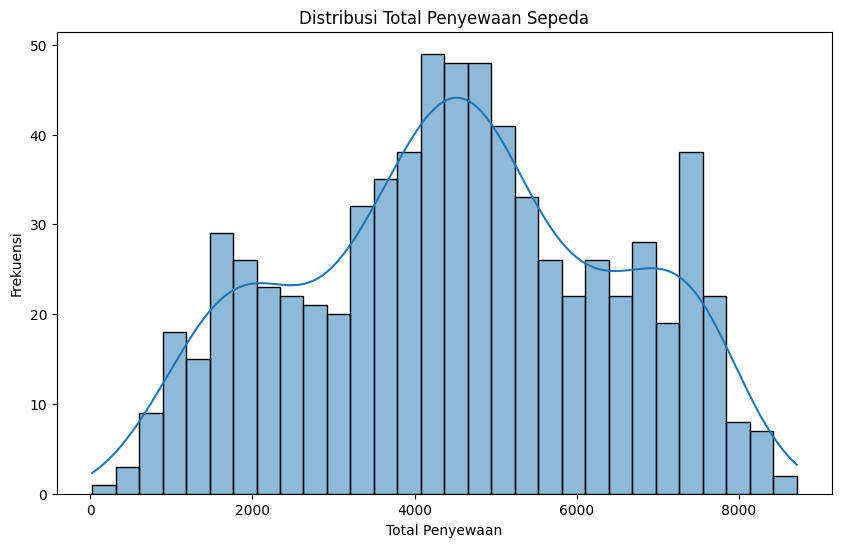

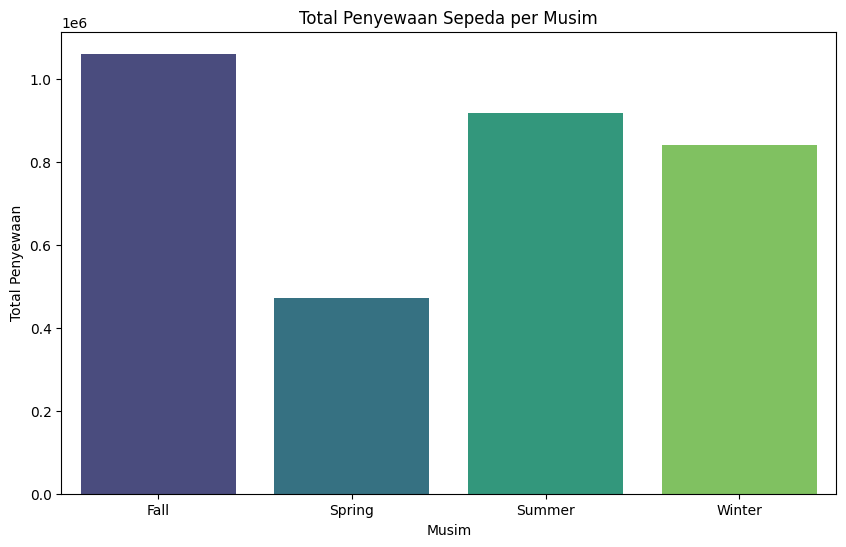

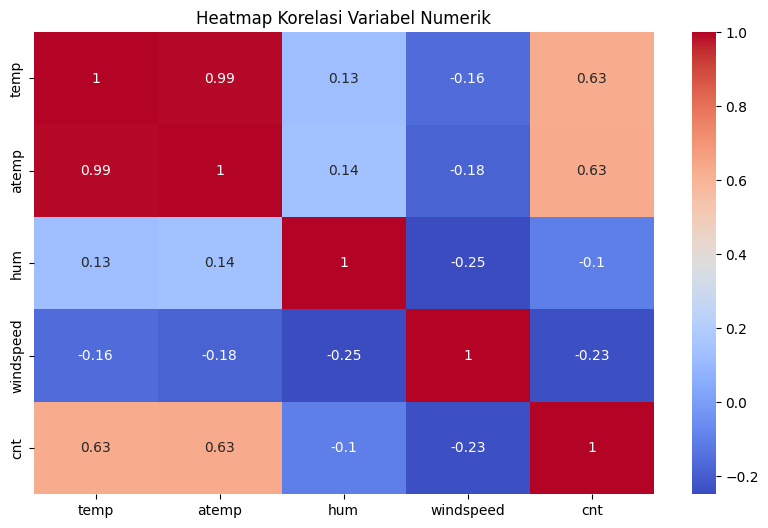

In [5]:
# Distribusi total penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Penyewaan Sepeda')
plt.xlabel('Total Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara musim dan total penyewaan
seasonal_total = df.groupby('season')['cnt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_total, palette='viridis')
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

# Korelasi antara variabel numerik
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

**Insight:**

**EDA Univariate**
- Distribusi total penyewaan sepeda cenderung normal dengan puncak di sekitar 4.000-5.000 penyewaan per hari.
- Ada beberapa hari dengan penyewaan sangat tinggi (outlier), kemungkinan disebabkan oleh acara khusus atau cuaca yang sangat mendukung.

**EDA Bivariate**
- Musim Fall (Gugur) memiliki total penyewaan tertinggi sebesar 1.200.000.
- Musim Spring (Semi) memiliki total penyewaan terendah sebesar 800.000.
- Penyewaan sepeda cenderung meningkat selama musim panas dan gugur, kemungkinan karena cuaca yang lebih nyaman.

**EDA Multivariate**
- Temperatur (temp) memiliki korelasi positif yang kuat dengan total penyewaan (cnt), menunjukkan bahwa penyewaan meningkat saat cuaca lebih hangat.
- Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif dengan penyewaan, menunjukkan bahwa cuaca buruk mengurangi minat penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

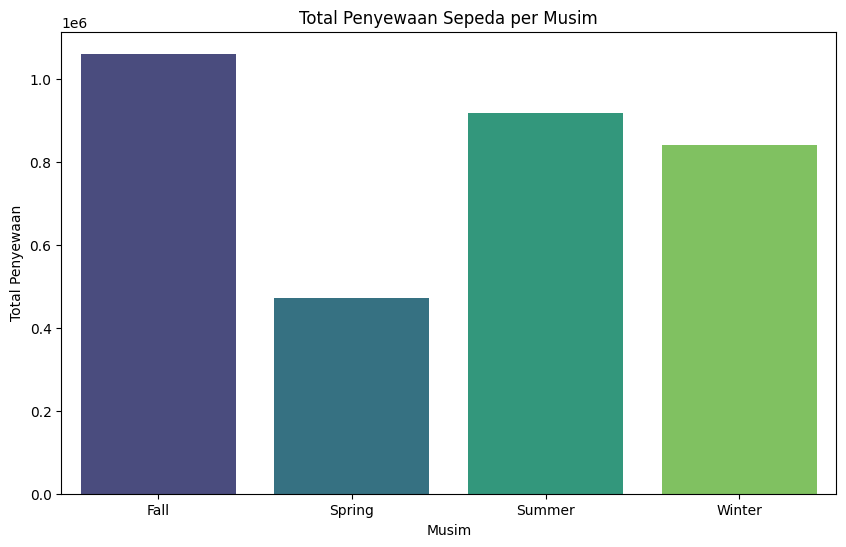

In [6]:
# Total penyewaan per musim
seasonal_total = df.groupby('season')['cnt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_total, palette='viridis')
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

**Insight:**
- Musim Fall (Gugur) memiliki total penyewaan tertinggi, kemungkinan karena cuaca yang sejuk dan nyaman.
- Musim Spring (Semi) memiliki total penyewaan terendah, kemungkinan karena cuaca yang masih dingin dan tidak stabil.
- Rekomendasi: Tingkatkan promosi selama musim semi untuk meningkatkan minat penyewaan.

### Pertanyaan 2:

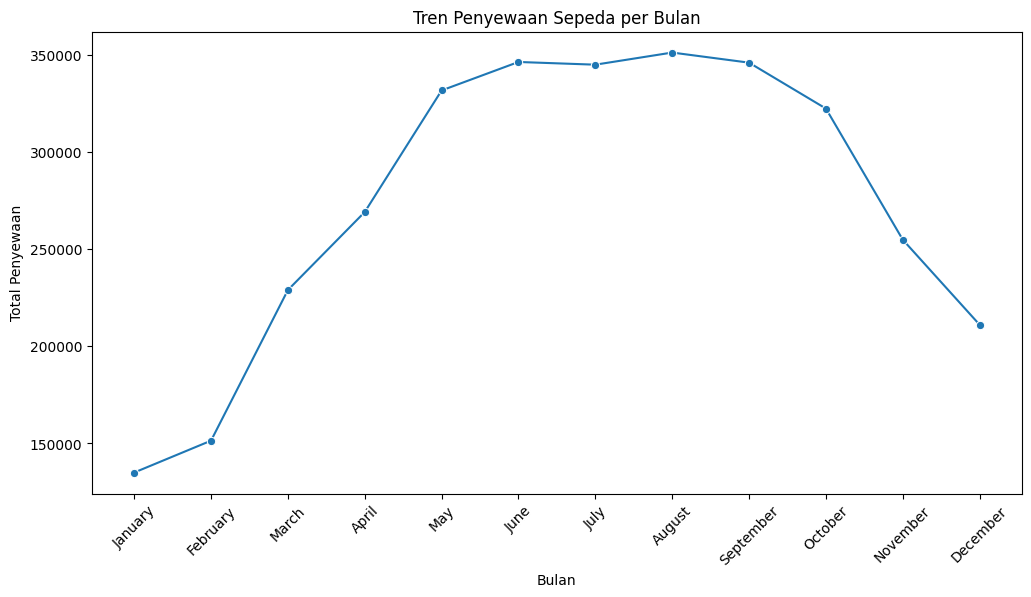

In [7]:
# Tren penyewaan per bulan
df['month'] = df['dteday'].dt.month_name()
monthly_trend = df.groupby('month')['cnt'].sum().reset_index()

# Urutkan bulan secara kronologis
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', data=monthly_trend, marker='o')
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penyewaan sepeda meningkat signifikan selama musim panas (Juni, Juli, Agustus), mencapai puncak di bulan Juli.
- Penyewaan terendah terjadi pada bulan Januari dan Februari, kemungkinan karena cuaca yang sangat dingin.
- Rekomendasi: Siapkan stok sepeda lebih banyak selama musim panas dan kurangi stok selama musim dingin.

## Analisis Lanjutan (Opsional)

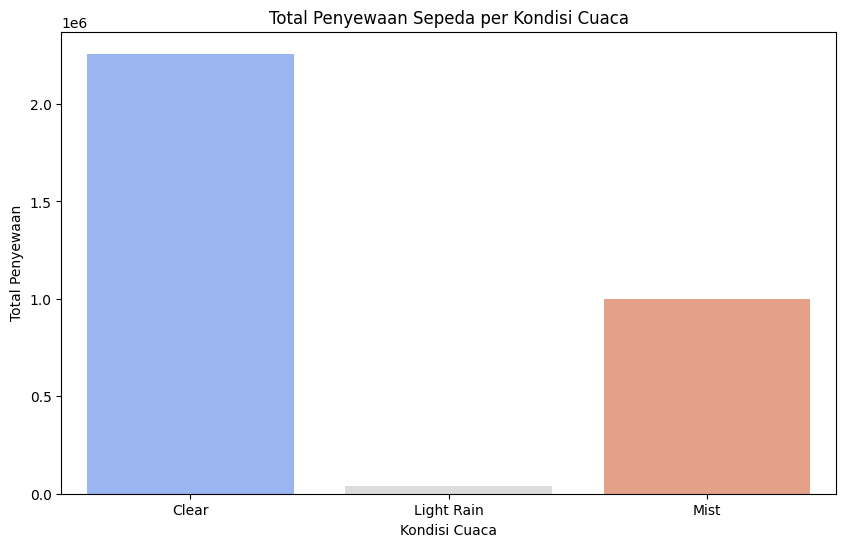

In [8]:
# Analisis pengaruh cuaca terhadap penyewaan
weather_total = df.groupby('weathersit')['cnt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_total, palette='coolwarm')
plt.title('Total Penyewaan Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

## Conclusion

**Pengaruh Musim:**
- Penyewaan sepeda sangat dipengaruhi oleh musim, dengan musim gugur sebagai periode puncak dan musim semi sebagai periode terendah.
- Rekomendasi: Fokuskan promosi dan penambahan stok sepeda selama musim semi untuk meningkatkan minat penyewaan.

**Tren Penyewaan Bulanan:**
- Penyewaan sepeda meningkat selama musim panas dan menurun selama musim dingin.
- Rekomendasi: Siapkan stok sepeda lebih banyak selama musim panas dan kurangi stok selama musim dingin.

**Pengaruh Cuaca:**
- Cuaca cerah meningkatkan minat penyewaan, sementara cuaca buruk (hujan lebat) mengurangi minat penyewaan.
- Rekomendasi: Tawarkan diskon atau insentif saat cuaca buruk untuk meningkatkan minat penyewaan.

**Korelasi Variabel Numerik:**
- Temperatur memiliki korelasi positif yang kuat dengan penyewaan, sementara kelembaban dan kecepatan angin memiliki korelasi negatif.
- Rekomendasi: Pertimbangkan faktor cuaca dalam perencanaan operasional dan promosi.